# Template matching with noise
This repo demonstrate the robustness of template matching against noise.
The following script run 2 detections with the same template, image and parameters.
Only for the second detection we introduce some random noise in the image.

In [1]:
# Set the active directory to the repos' root when locally testing (not necessary if MTM installed with pip or running on binder) 
%cd ..

C:\Users\Laurent\Documents\github\MultiTemplateMatching-Python


In [13]:
# 1st import the package and check its version
import MTM
print("MTM version : ", MTM.__version__)

from MTM import matchTemplates, plotDetections

from skimage import io
from skimage.util import random_noise

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

MTM version :  1.5.4


Let's open one image from the Zenodo repo using scikit-image

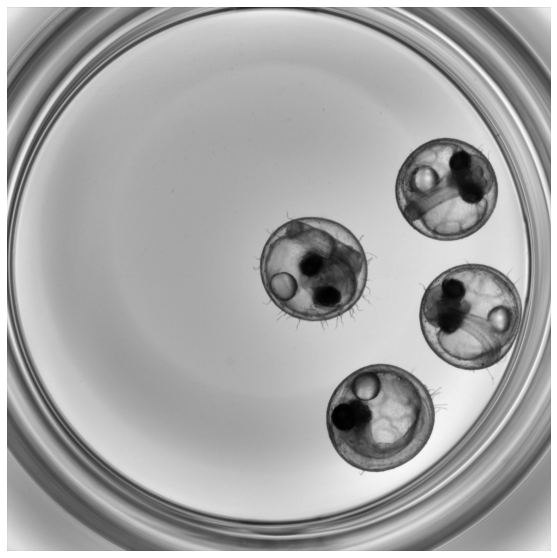

In [4]:
URL = r"https://zenodo.org/record/2650147/files/WE00049---E001--PO01--LO001--CO6--00000000_00.01.00_00.16.00%2C000.jpg"
image = io.imread(URL)
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(image, cmap="gray")

Let's crop one of the embryo to use as a template.

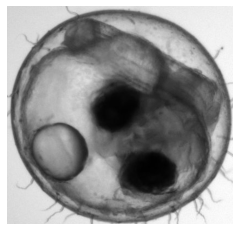

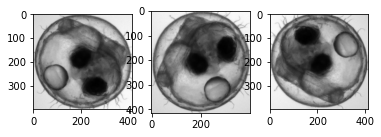

In [9]:
temp0 = image[784:784+400, 946:946+414] # with well 49 
plt.axis("off")
plt.imshow(temp0, cmap="gray")

listTemplate = [temp0]
listLabels = ["0"]

# Initialise figure
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

for i,angle in enumerate([90,180]):
    rotated = np.rot90(temp0, k=i+1) # NB: rotate not good here, turns into float!
    listTemplate.append(rotated)
    listLabels.append(str(angle))
    axarr[i+1].imshow(rotated, cmap="gray")

We can now call `matchTemplates` with this single template image and the initial image

In [11]:
Hits = matchTemplates(image, listTemplate, listLabels, score_threshold=0.3, maxOverlap=0.3, nObjects=4)
Hits

[(BoundingBox: 1.00, xyxy:(946, 784, 1359, 1183), 0, 0),
 (BoundingBox: 0.59, xyxy:(1525, 968, 1938, 1367), 2, 180),
 (BoundingBox: 0.55, xyxy:(1173, 1354, 1586, 1753), 2, 180),
 (BoundingBox: 0.54, xyxy:(1459, 474, 1858, 887), 1, 90)]

# Adding noise
Let see the effect on the detection when we add noise to the initial image.

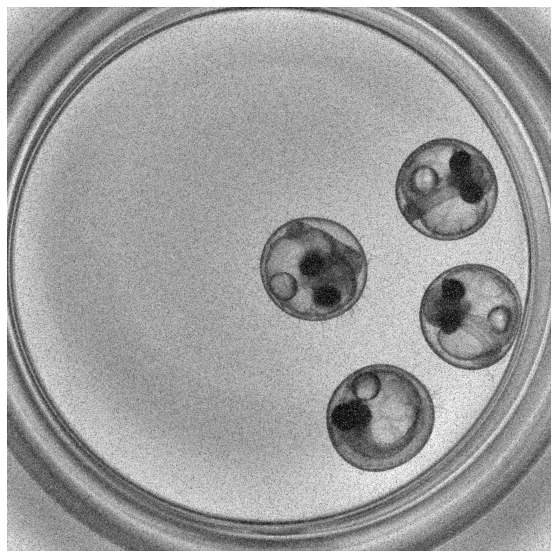

In [15]:
# Generate gaussian distributed noise, the noise intensity is set by the level variable
#noise = np.empty_like(image, dtype="int8")
#level = 50
#cv2.randn(noise,(0),(level)) # Matrix element are 0 in average
                
#plt.figure(figsize = (10,10))
#plt.axis("off")
#plt.imshow(noise, cmap="gray")

#imageNoise = cv2.add(image,noise, dtype=cv2.CV_8U)

imageNoise = random_noise(image, mode='s&p',amount=0.2)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(imageNoise, cmap="gray")

In [19]:
# Call again matchTemplates with the noisy image this time, but the same template
Hits_Noise = matchTemplates(imageNoise,  listTemplate, listLabels, score_threshold=0.3, maxOverlap=0.3, nObjects=4)

print("Initial detections")
print(Hits)

print("\nDetections with noise")
print(Hits_Noise)

Initial detections
[(BoundingBox: 1.00, xyxy:(946, 784, 1359, 1183), 0, 0), (BoundingBox: 0.59, xyxy:(1525, 968, 1938, 1367), 2, 180), (BoundingBox: 0.55, xyxy:(1173, 1354, 1586, 1753), 2, 180), (BoundingBox: 0.54, xyxy:(1459, 474, 1858, 887), 1, 90)]

Detections with noise
[(BoundingBox: 0.60, xyxy:(946, 784, 1359, 1183), 0, 0), (BoundingBox: 0.37, xyxy:(1524, 968, 1937, 1367), 2, 180), (BoundingBox: 0.35, xyxy:(1172, 1354, 1585, 1753), 2, 180), (BoundingBox: 0.34, xyxy:(1458, 474, 1857, 887), 1, 90)]


The coordinates of the bounding boxes are slightly shifted by a few pixels with the noisy version of the image, and as we could expect the score is also reduced.

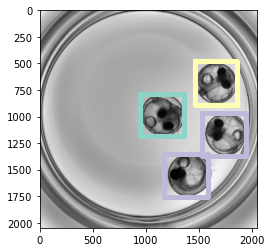

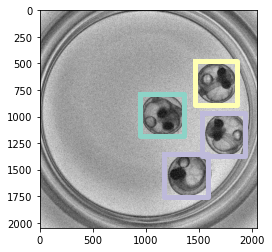

In [20]:
plotDetections(image, Hits, thickness=5)
plotDetections(imageNoise, Hits_Noise, thickness=5)